In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [217]:
data = pd.read_csv('dataset_tratado.csv')
data.head()

,abreviacao,pais,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
0,CHN,China,1425873641,1,36.0,0.52,0.30,1.21,1010740000,2425.471293,43.10,54.30,116.0,East Asia & Pacific,Upper middle income
1,IND,India,1418914739,2,58.0,0.68,0.05,2.73,833710000,786.700098,29.54,34.45,145.0,South Asia,Lower middle income
2,USA,United States,338573477,3,45.0,3.33,1.00,30.00,312320000,37491.179520,81.70,75.23,68.0,North America,High income
3,IDN,Indonesia,275818905,4,53.0,0.42,0.17,2.94,196000000,1143.831514,51.46,32.29,150.0,East Asia & Pacific,Lower middle income
4,PAK,Pakistan,236650690,5,60.0,0.59,0.06,8.59,118800000,668.547943,36.16,30.68,184.0,South Asia,Lower middle income


In [218]:
df = gpd.read_file(r'datasets\UIA_Latitude_Longitude_Graticules_and_World_Countries_Boundaries.geojson')

In [219]:
df = df.rename(columns = {'CNTRY_NAME': 'pais'})
df.head()

,OBJECTID,pais,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [220]:
map_ = pd.merge(df, data, how = 'outer', on = 'pais')

In [221]:
map_.head()

,OBJECTID,pais,geometry,abreviacao,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
0,1.0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",AFG,41325562.0,36.0,35.0,1.02,0.38,2.12,4068194.0,NaN,24.04,11.45,194.0,South Asia,Low income
3,4.0,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",DZA,45032322.0,34.0,20.0,0.51,0.16,2.24,26350000.0,2231.993335,65.22,47.69,130.0,Middle East & North Africa,Lower middle income
4,5.0,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...",AZE,10368297.0,91.0,42.0,1.82,0.24,9.80,7763795.0,2344.896916,51.92,79.00,54.0,Europe & Central Asia,Upper middle income


In [222]:
data.shape

(163, 15)

In [223]:
map_.shape

(256, 17)

In [224]:
# import json
# mapa2 = json.load(open(r'datasets\UIA_Latitude_Longitude_Graticules_and_World_Countries_Boundaries.geojson'))


In [225]:
# mapa2['features'][0]['properties']

In [226]:
# teste = {}
# for feature in mapa2['features']:
#     feature['id'] = feature['properties']['OBJECTID']
#     teste[feature['properties']['CNTRY_NAME']] = feature['id']

In [227]:
# for i in range(len(df)):
#     if df.loc[i, 'pais'] == '':
#         i + 1
        
#     else:
#         data['id'] = df['pais'].apply(lambda x: teste[x])

In [228]:
# fig = px.choropleth_mapbox(data, locations="id", geojson=mapa2, center={"lat": 33.69164156860592, "lon":21.234290711247912}, zoom=1.5, color="populacao", color_continuous_scale="Redor", opacity=0.4, mapbox_style = 'open-street-map')
# fig.show()

<AxesSubplot:>

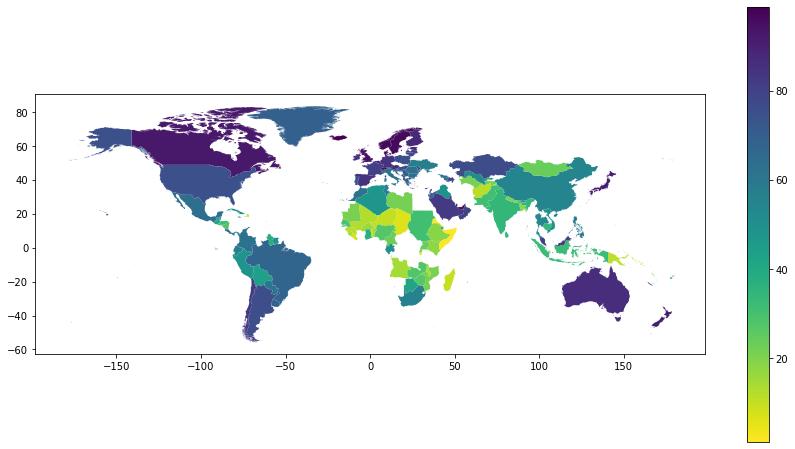

In [229]:
fig, ax = plt.subplots(figsize = (15,8))
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=plt.Normalize(vmin=map_['usuarios_internet_%'].min(), vmax=map_['usuarios_internet_%'].max()))
cbar = fig.colorbar(sm)
map_.plot('usuarios_internet_%', ax=ax, cmap="viridis_r")

In [230]:
for i in range(len(map_)):
    if (map_.loc[i, 'PIB_per_capita'] > 60000):
        print (map_.loc[i, 'pais'])
    else:
        None

Bermuda
Liechtenstein
Monaco


In [231]:
map_.loc[map_.pais == 'Monaco']

,OBJECTID,pais,geometry,abreviacao,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
148,148.0,Monaco,"POLYGON ((7.39161 43.72755, 7.39090 43.74937, ...",MCO,36469.0,217.0,3.0,1.08,0.84,2.37,37553.0,105147.4377,100.0,97.05,10.0,Europe & Central Asia,High income


In [232]:
map_ = map_.drop(148)
map_ = map_.drop(18)
map_ = map_.drop(134)

<AxesSubplot:>

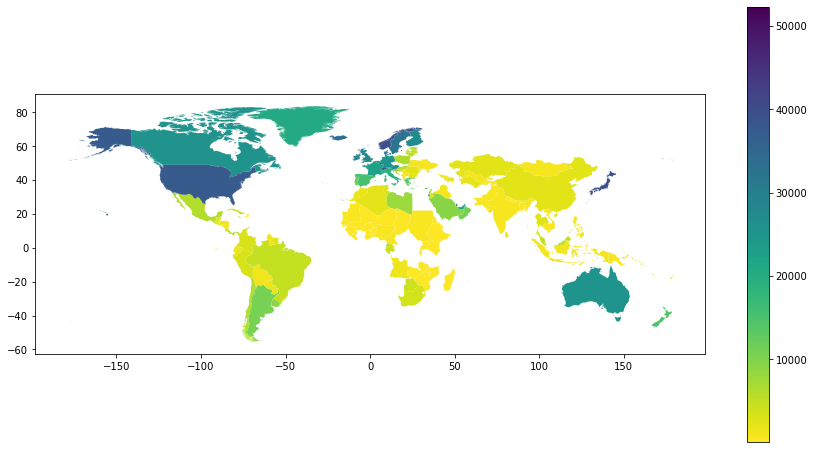

In [233]:
fig, ax = plt.subplots(figsize = (15,8))
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=plt.Normalize(vmin=map_['PIB_per_capita'].min(), vmax=map_['PIB_per_capita'].max()))
cbar = fig.colorbar(sm)
map_.plot('PIB_per_capita', ax=ax, cmap="viridis_r")